In [7]:
# importing the dataset
import pandas as pd
df=pd.read_csv(r"C:\Users\Administrator\Documents\Twitter_Data.csv")
df.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]>

In [8]:
#viewing the columns
df.columns

Index(['clean_text', 'category'], dtype='object')

In [15]:
#renaming the column
df=df.rename (columns={"clean_text":"Text","category": "Sentiment"}) 

In [16]:
label_map = {-1: "negative", 0: "neutral", 1: "positive"}
df["Label_Text"] = df["Sentiment"].map(label_map)

# Map -1,0,1 to 0,1,2 for ML model
num_map = {-1: 0, 0: 1, 1: 2}
df["Label"] = df["Sentiment"].map(num_map)

# Check first few rows
print(df[["Text", "Sentiment", "Label_Text", "Label"]].head())

                                                Text  Sentiment Label_Text  \
0  when modi promised “minimum government maximum...       -1.0   negative   
1  talk all the nonsense and continue all the dra...        0.0    neutral   
2  what did just say vote for modi  welcome bjp t...        1.0   positive   
3  asking his supporters prefix chowkidar their n...        1.0   positive   
4  answer who among these the most powerful world...        1.0   positive   

   Label  
0    0.0  
1    1.0  
2    2.0  
3    2.0  
4    2.0  


Label_Text
positive    72250
neutral     55213
negative    35510
Name: count, dtype: int64


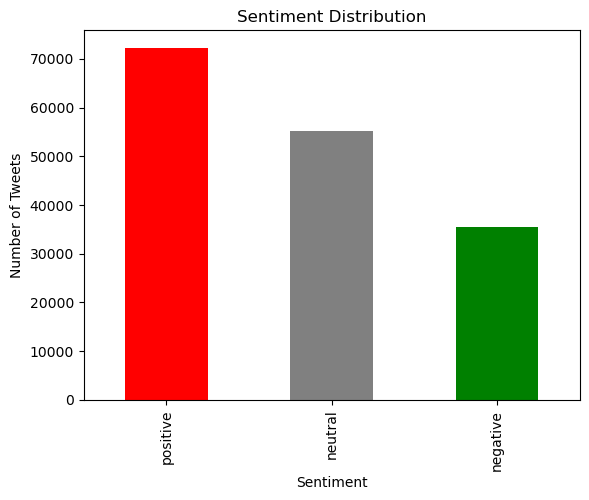

In [17]:
import matplotlib.pyplot as plt

# Count how many tweets per sentiment
print(df["Label_Text"].value_counts())

# Visualize
df["Label_Text"].value_counts().plot(kind="bar", color=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


In [19]:
df = df.dropna()

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Check if there are still NaN values
print(df.isnull().sum())

Text          0
Sentiment     0
Label_Text    0
Label         0
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

# Features (tweet text)
X = df["Text"]

# Target (numeric labels 0,1,2)
y = df["Label"]

# Split the data — stratify to keep class proportions same in train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training size:", len(X_train))
print("Testing size:", len(X_test))


Training size: 130375
Testing size: 32594


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['Text'],  # raw text
    df['Sentiment'],  # labels (-1, 0, 1)
    test_size=0.2,
    random_state=42
)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=200)

In [38]:
y_pred = model.predict(X_test_vec)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9255691231515003

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.91      0.82      0.87      7152
         0.0       0.92      0.98      0.95     11067
         1.0       0.94      0.94      0.94     14375

    accuracy                           0.93     32594
   macro avg       0.92      0.91      0.92     32594
weighted avg       0.93      0.93      0.92     32594


Confusion Matrix:
 [[ 5898   518   736]
 [   85 10824   158]
 [  471   458 13446]]


In [39]:
new_texts = ["I love this product!", "This is the worst thing ever."]
new_vec = vectorizer.transform(new_texts)
predictions = model.predict(new_vec)
print(predictions)


[ 1. -1.]
